<a href="https://colab.research.google.com/github/darklord213/DogCatClassification/blob/master/DogCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from keras.preprocessing import image


Using TensorFlow backend.


In [0]:
path="/content/drive/My Drive/catvsdog_train"
def loadImages(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, file)
                          for file in os.listdir(path)
                          if file.endswith('.jpg')])
    return image_files

In [0]:
import os
dataset = loadImages(path)

In [7]:
dataset[0]


'/content/drive/My Drive/catvsdog_train/cat.0.jpg'

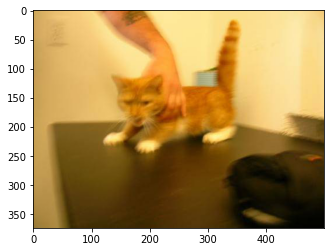

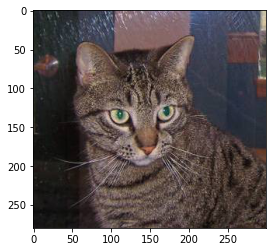

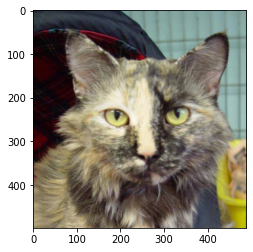

In [8]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
for ima in dataset[0:3]:
  img=mpimg.imread(ima)
  imgplt=plt.imshow(img)
  plt.show()

In [0]:
nrows = 150
ncolumns = 150
channels = 3

In [0]:
def read_and_process_image(list_of_images):
  x=[]
  y=[]
  cat=0
  dog=0
  print(len(list_of_images))
  for image in list_of_images:
    x.append(cv2.resize(cv2.imread(image , cv2.IMREAD_COLOR), (nrows,ncolumns),interpolation=cv2.INTER_CUBIC))
    if 'cat.' in image:
      y.append(1)
      cat=cat+1
    elif 'dog.' in image:
      y.append(0)
      dog=dog+1
  print(cat)
  print(dog)
  return x,y

In [11]:
import cv2
X, y = read_and_process_image(dataset)

110
50
60


In [12]:
X[0]

array([[[ 87, 164, 203],
        [ 92, 169, 208],
        [ 93, 170, 209],
        ...,
        [123, 206, 247],
        [120, 203, 245],
        [122, 201, 240]],

       [[ 87, 164, 203],
        [ 92, 169, 208],
        [ 93, 170, 209],
        ...,
        [124, 207, 245],
        [121, 204, 245],
        [122, 201, 240]],

       [[ 87, 164, 203],
        [ 92, 169, 208],
        [ 93, 170, 209],
        ...,
        [127, 209, 246],
        [125, 206, 245],
        [124, 203, 242]],

       ...,

       [[ 54, 124, 156],
        [ 55, 125, 158],
        [ 58, 125, 160],
        ...,
        [  0,   4,   3],
        [  0,   4,   3],
        [  0,   2,   2]],

       [[ 56, 123, 154],
        [ 57, 124, 155],
        [ 60, 127, 158],
        ...,
        [  0,   2,   2],
        [  0,   2,   2],
        [  0,   2,   2]],

       [[ 54, 121, 152],
        [ 55, 122, 153],
        [ 58, 125, 156],
        ...,
        [  0,   2,   2],
        [  0,   2,   2],
        [  0,   2,   2]]

In [13]:
y[0]

1

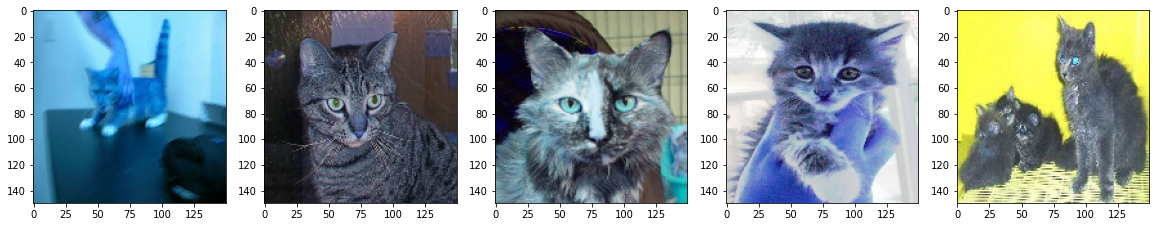

In [14]:
plt.figure(figsize=(20,10))
columns=5
for i in range(columns):
  plt.subplot(5/columns+1,columns,i+1)
  plt.imshow(X[i])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'dog and cat')

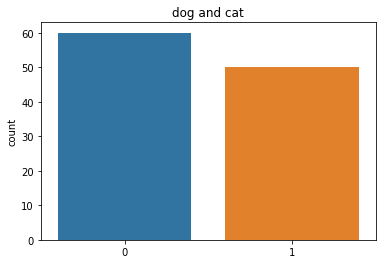

In [15]:
import seaborn as sns
import numpy as np
X=np.array(X)
Y=np.array(y)
sns.countplot(y)
plt.title('dog and cat')

In [16]:
print("shape of train images",X.shape)
print("shape of labels",Y.shape)

shape of train images (110, 150, 150, 3)
shape of labels (110,)


In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [0]:
from keras.models import Sequential
from keras import models
from keras import  layers
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [0]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
model.compile(loss="binary_crossentropy",optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])


In [0]:
train_datagen=ImageDataGenerator(rescale=1./255 , 
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow(X_train, Y_train, batch_size=10)
val_generator = test_datagen.flow(X_test,Y_test,batch_size=10)

In [26]:
history=model.fit_generator(train_generator,epochs=64,validation_data=val_generator)

Epoch 1/64
9/9 [==============================] - 5s 533ms/step - loss: 0.6097 - acc: 0.6364 - val_loss: 0.8562 - val_acc: 0.2273
Epoch 2/64
9/9 [==============================] - 4s 480ms/step - loss: 0.5736 - acc: 0.7273 - val_loss: 0.8706 - val_acc: 0.2273
Epoch 3/64
9/9 [==============================] - 4s 490ms/step - loss: 0.5870 - acc: 0.6818 - val_loss: 0.9098 - val_acc: 0.3182
Epoch 4/64
9/9 [==============================] - 4s 492ms/step - loss: 0.5858 - acc: 0.7045 - val_loss: 1.3704 - val_acc: 0.2727
Epoch 5/64
9/9 [==============================] - 4s 482ms/step - loss: 0.6144 - acc: 0.6250 - val_loss: 1.1133 - val_acc: 0.2273
Epoch 6/64
9/9 [==============================] - 5s 506ms/step - loss: 0.5921 - acc: 0.6477 - val_loss: 1.6431 - val_acc: 0.2273
Epoch 7/64
9/9 [==============================] - 4s 490ms/step - loss: 0.6242 - acc: 0.6477 - val_loss: 0.9901 - val_acc: 0.1818
Epoch 8/64
9/9 [==============================] - 4s 491ms/step - loss: 0.5972 - acc: 0.72

TEST DATA

In [0]:
path="/content/drive/My Drive/catvsdog_test"
def loadImages(path):
    
    image_files = sorted([os.path.join(path, file)
                          for file in os.listdir(path)
                          if file.endswith('.jpg')])
    return image_files

In [0]:
test_dataset = loadImages(path)

In [29]:
X_test1, y_test1 = read_and_process_image(test_dataset)


20
10
10


In [0]:
X_test1=np.array(X_test1)

In [31]:
print("shape of train images",X_test1.shape)

shape of train images (20, 150, 150, 3)


In [0]:
test1_datagen=ImageDataGenerator(rescale=1./255)

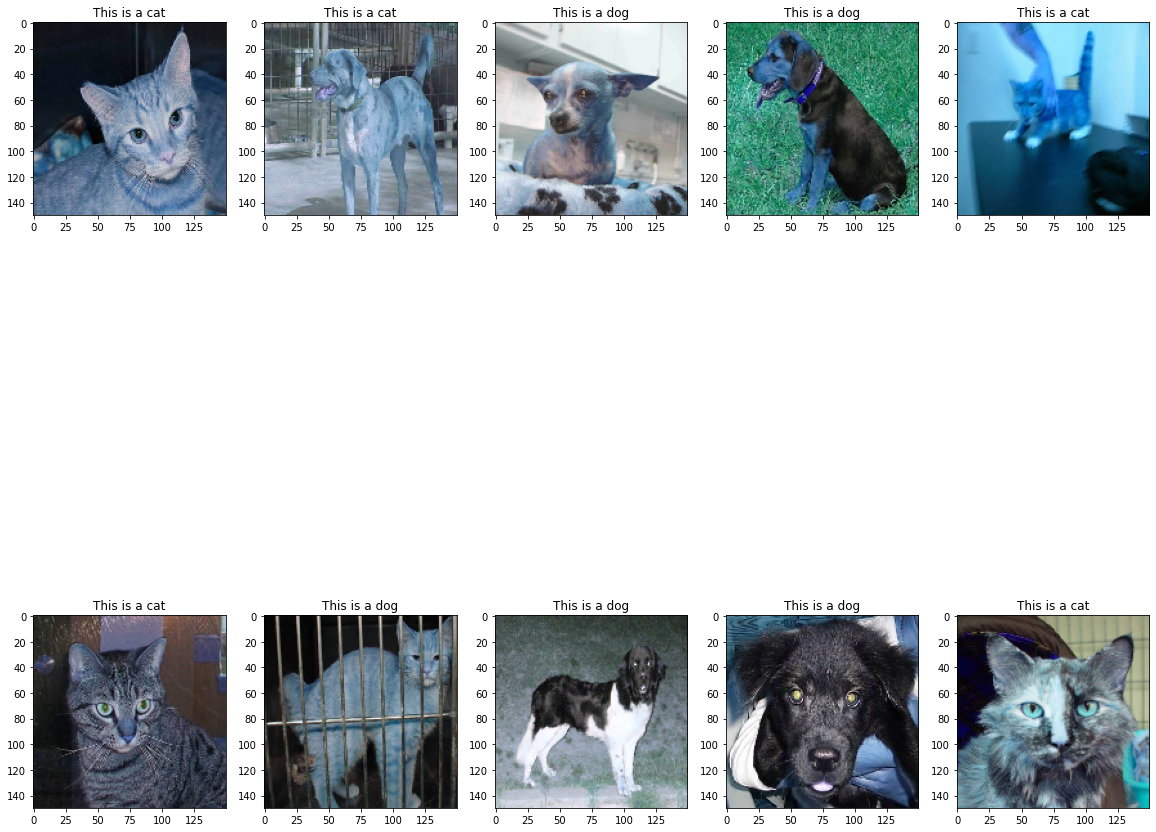

In [33]:
i=0
text_labels=[]
plt.figure(figsize=(20,20))
for batch in test1_datagen.flow(X_test1,batch_size=1):
  pred=model.predict(batch)
  if pred>0.5 :
   text_labels.append('cat')
  else:
     text_labels.append('dog')
  plt.subplot(5/columns+1,columns,i+1)
  plt.title('This is a '+text_labels[i])
  imgplot=plt.imshow(batch[0])
  i+=1
  if i%10==0:
    break
plt.show()